# 계층적 클러스터링

앞에서 배운 클러스터링 방법들은 데이터가 가진 클래스와 사용자가 정해준 클래스 수가 다르면 제대로 된 클러스터링을 할 수 없다는 단점이 있다. 모든 클러스터 수를 고려해서 클러스터링을 하는 방법으로 계층적 클러스터링(Agglomerative Clustering)이 있다. 계층적 클러스터링은 하나의 데이터 샘플을 하나의 클러스터로 보고 가장 유사도가 높은 클러스터를 합치면서 클러스터 갯수를 줄여 가는 방법을 말한다. 그러므로 처음에는 $K = N$이 되고, 가장 유사한 클러스터 2개를 하나로 합치면 $K = N-1$, 그 다음 단계에서는 $K = N-2$이 되고, $K= N-3, ..., K = 2, K = 1$이 될 때까지 진행한다. 

## 클러스터간의 거리 측정

여태까지 데이터 간의 거리를 쟀다면 계층적 클러스터링은 클러스터간 거리를 측정한다. 클러스터간의 비유사도(dissimilarity) 혹은 거리(distance)를 측정하는 방법에는 다음과 같은 것이 있다.

### 비귀납적 방법
계층적 클러스터링이 아니어도 쓸 수 있고, 일반적으로 계산량이 많다.

#### centroid
두 클러스터의 중심점(centroid)를 정의한 다음 두 중심점의 거리를 클러스터간의 거리로 정의한다. 두 클러스터가 평행하게 분포하지 않을 경우에 거리를 재는 방법의 이견이 있을 수 있다.

$$
   d(u,v) = \|c_u - c_v\|_2
$$

여기에서  $c_u$ 와 $c_v$ 는 각각 두 클러스터 $u$ 와 $v$ 의 중심점이다. 

#### single
클러스터 $u$의 모든 데이터 $i$와 클러스터 $v$의 모든 데이터 $j$의 모든 조합에 대해 거리를 측정해서 최소값을 클러스터 간의 거리로 정의한다. 최소 거리(Nearest Point) 방법이라고도 한다.

$$
   d(u,v) = \min(dist(u[i],v[j]))
$$

#### complete
클러스터 $u$의 모든 데이터 $i$와 클러스터 $v$의 모든 데이터 $j$의 모든 조합에 대해 거리를 측정한 후 가장 큰 값을 구한다. Farthest Point Algorithm 또는  Voor Hees Algorithm 이라고도 한다.

$$
   d(u, v) = \max(dist(u[i],v[j]))
$$

#### average
클러스터 $u$의 모든 데이터 $i$와 클러스터 $v$의 모든 데이터 $j$의 모든 조합에 대해 거리를 측정한 후 평균을 구한다. $|u|$와 $|v|$는 각각 두 클러스터의 원소의 갯수를 뜻한다.

$$
   d(u,v) = \sum_{ij} \frac{d(u[i], v[j])}{|u||v|}
$$


### 귀납적 방법
계층적 클러스터링을 한다는 가정하에 거리를 구하는 방법으로 일반적인 경우에 사용할 수 없다.


#### median
이 방법은 Agglomerative Clustering 에서 사용할 수 있는 귀납적 방법으로 centroid 방법의 변형이다.  만약 클러스터 $u$가 클러스터 $s$와 클러스터 $t$가 결합하여 생겼다면 클러스터 $u$의 중심점은 새로 계산하지 않고 원래 두 클러스터의 중심점의 평균을 사용한다. 정확하진 않지만 빠르다.

#### weighted
이 방법은 Agglomerative Clustering 에서 사용할 수 있는 귀납적 방법이다. 만약 클러스터 $u$가 클러스터 $s$와 클러스터 $t$가 결합하여 생겼다면 
다음과 같이 각각의 원래 클러스터들과 합쳐진 $s$, $t$ 클러스터와의 거리를 쟀던 것을 평균내서 새로 만들어진 클러스터와 원래 클러스터까지의 거리로 사용한다. 새로 만들어진 클러스터 중 기존의 한 클러스터와 거리가 같은 클러스터가 두 개 이상일 때, 제일 가까운 하나를 선택할 수 없다.

$$
   d(u,v) = (dist(s,v) + dist(t,v))/2
$$

#### Ward
이 방법은 Agglomerative Clustering 에서 계산량이 적고 원래의 값과 비슷하여 가장 많이 사용하는 방법이다. 만약 클러스터 $u$가 클러스터 $s$와 클러스터 $t$가 결합하여 생겼다면 다음과 같이 **두 클러스터의 거리의 가중 평균에서 원래의 두 클래스터 사이의 거리를 보정한 값**을 사용한다.

$$
   d(u,v) = \sqrt{\frac{|v|+|s|}{|v|+|s|+|t|}d(v,s)^2 + \frac{|v|+|t|}{|v|+|s|+|t|}d(v,t)^2 - \frac{|v|}{|v|+|s|+|t|}d(s,t)^2}
$$
이 식에서 $|\cdot|$ 기호는 클러스터의 원소의 갯수를 말한다. 

## SciPy의 계층적 클러스터링

* [scipy.cluster.hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)
 * Agglomerative 방식 클러스터링
 
 
* [scipy.cluster.hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) 
 * 클러스터링 결과를 tree 형태로 시각화
 
 
* 참고 자료
 * https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/#Perform-the-Hierarchical-Clustering

(150, 2)


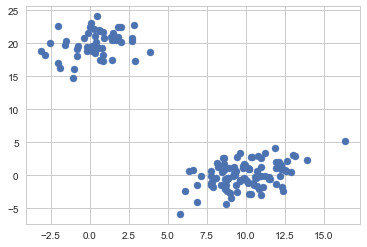

In [5]:
%matplotlib inline
from scipy.cluster.hierarchy import linkage, dendrogram
np.set_printoptions(precision=5, suppress=True) 

np.random.seed(4711)  # for repeatability of this tutorial
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
print(X.shape)

plt.scatter(X[:,0], X[:,1], s=50)
plt.show()

In [2]:
# ward 방법으로 클러스터링
Z = linkage(X, 'ward')

In [3]:
Z[:20]

array([[ 52.     ,  53.     ,   0.04151,   2.     ],
       [ 14.     ,  79.     ,   0.05914,   2.     ],
       [ 33.     ,  68.     ,   0.07107,   2.     ],
       [ 17.     ,  73.     ,   0.07137,   2.     ],
       [  1.     ,   8.     ,   0.07543,   2.     ],
       [ 85.     ,  95.     ,   0.10928,   2.     ],
       [108.     , 131.     ,   0.11007,   2.     ],
       [  9.     ,  66.     ,   0.11302,   2.     ],
       [ 15.     ,  69.     ,   0.11429,   2.     ],
       [ 63.     ,  98.     ,   0.1212 ,   2.     ],
       [107.     , 115.     ,   0.12167,   2.     ],
       [ 65.     ,  74.     ,   0.1249 ,   2.     ],
       [ 58.     ,  61.     ,   0.14028,   2.     ],
       [ 62.     , 152.     ,   0.1726 ,   3.     ],
       [ 41.     , 158.     ,   0.1779 ,   3.     ],
       [ 10.     ,  83.     ,   0.18635,   2.     ],
       [114.     , 139.     ,   0.20419,   2.     ],
       [ 39.     ,  88.     ,   0.20628,   2.     ],
       [ 70.     ,  96.     ,   0.21931,   2. 

- ward 방법의 결과로 거리가 제일 가까운 클러스터부터 보여진다. 총 데이터의 수가 150개 이므로 맨 처음 150개의 클러스터가 만들어지고 첫번째 행이 151번째 클러스터가 된다. 첫번째, 두번째 열은 클러스터 숫자이고, 세번째 열과 네번째 열은 앞의 두 클러스터 사이의 거리와 그 결합에서 합쳐진 클러스터 원소의 수를 의미한다.  

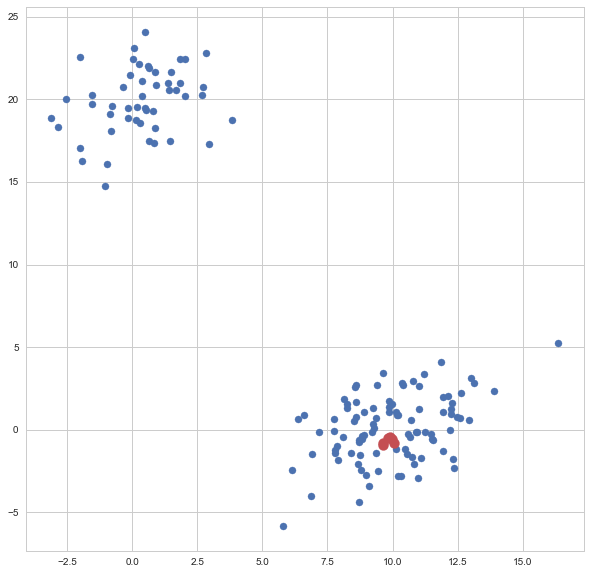

In [6]:
idxs = [33, 68, 62, 82, 63, 98]
plt.figure(figsize=(10, 10))
plt.scatter(X[:,0], X[:,1], s=50)
plt.scatter(X[idxs,0], X[idxs,1], c='r', s=100) 
plt.show()

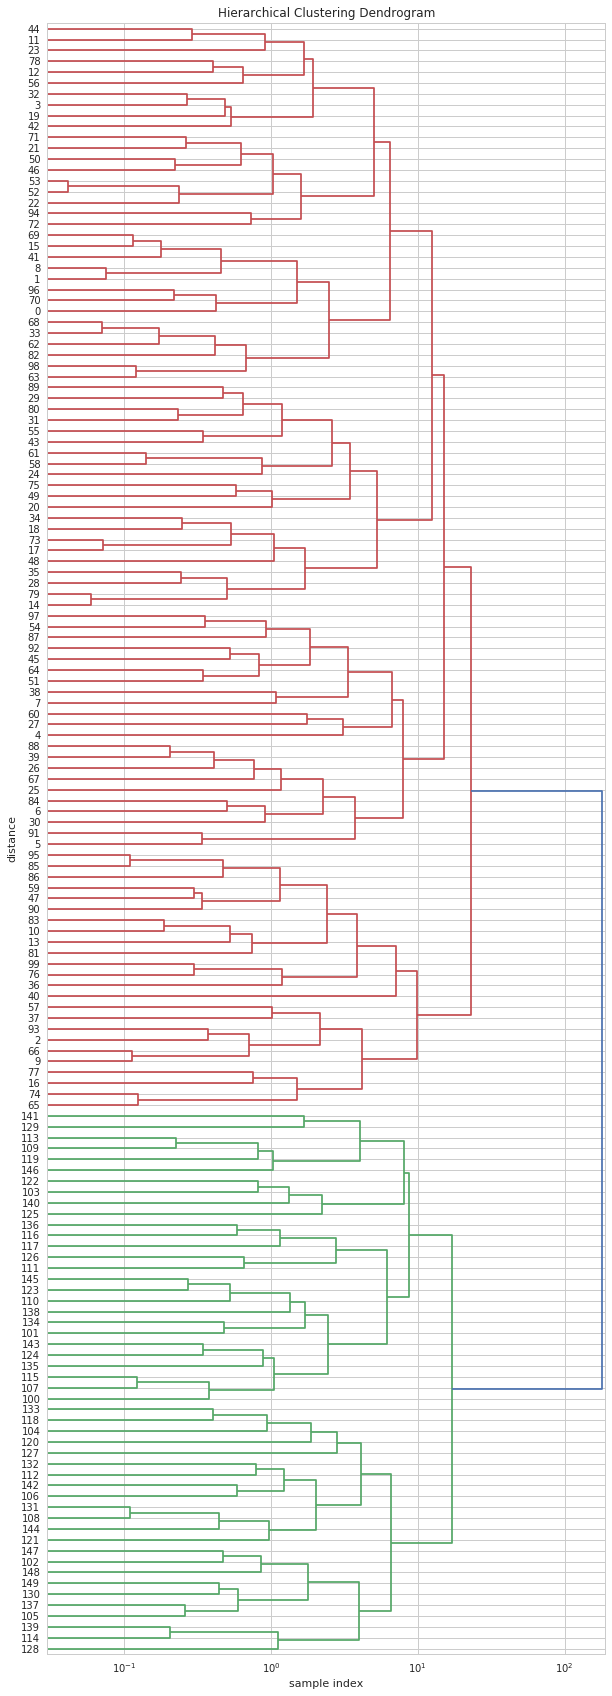

In [7]:
# 생성된 클러스터를 dendrogram으로 작성
mpl.rcParams["font.family"] = 'DejaVu Sans'
plt.figure(figsize=(10,30))
ax = plt.subplot(111)
dendrogram(Z, leaf_font_size=10, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
ax.set_xlim(xmin=0.03)
ax.set_xscale('log')
plt.show()

- dendrogram에서는 비슷한 클러스터는 근접하게 재배열 되어 나타난다. 즉, 유사도를 이용해 sort한 것과 같아진다. 왼쪽 위치에서 합쳐진 클러스터일 수록 거리가 가까워 먼저 합쳐진 클러스터이다. 최종적으로 얻으려는 클러스터의 개수는 그래프 오른쪽에서부터 구조를 보고 잘라내어 사용한다. 

- 변수간 상관계수 관찰할 때 계층적 클러스터링하여 비슷한 변수 순서로 heatmap을 그리면 색이 여기저기 널려있지 않고 비슷한 색(비슷한 상관도를 가진 변수)끼리 모아져 나타난다.